In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

# WordCloud and matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## TO DO

- assigning keywords to missing keyword labels - DONE
- remove symbols (#, ".. - DONE
- remove links - DONE
- validation
- make slides - IN PROCESS
- TFIDF, LSA, LSTM / RNNs, the list is long
- try different classifiers
- reading discussion board for inspiration


In [5]:
train = pd.read_csv("preprocessed_train_data.csv", index_col = 0)
test = pd.read_csv("preprocessed_test_data.csv", index_col = 0)

trained_tweets = train['keyword']+train['text']
test_tweets = test['keyword']+test['text']

In [6]:
trained_tweets.head()

0    earthquak  deed reason earthquak may allah for...
1     forest fire  forest fire near la rang ask canada
2    evacu  resid ask shelter place notifi offic ev...
3    wildfir  peopl receiv wildfir evacu order cali...
4    wildfir  got sent photo rubi alaska smoke wild...
dtype: object

In [7]:
test_tweets.head()

0                      crash  happen terribl car crash
1    earthquak  heard earthquak differ citi stay sa...
2    fire  forest fire spot pond gees flee across s...
3            apocalyps  apocalyps light spokan wildfir
4          typhoon  typhoon soudelor kill china taiwan
dtype: object

# Encoding and Vectorizers

In [8]:
# import category_encoders as ce

# # Target encoding
# features = ['keyword']
# encoder = ce.TargetEncoder(cols=features)
# encoder.fit(train[features],train['target'])

# train = train.join(encoder.transform(train[features]).add_suffix('_target'))
# test = test.join(encoder.transform(test[features]).add_suffix('_target'))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(trained_tweets, train['target'].values, 
        train_size = 0.80, test_size = 0.20, random_state = 12, shuffle=True) # We have split train-test dataset using 80:20 ratio

# TFIDF

In [10]:
#precompute vectorized representations
word_vectorizer = TfidfVectorizer(
    analyzer='word',
    stop_words='english',
    ngram_range=(1, 3),
    lowercase=True,
    min_df=5,
    max_features=30000)

char_vectorizer = TfidfVectorizer(
    analyzer='char',
    stop_words='english',
    ngram_range=(3, 6),
    lowercase=True,
    min_df=5,
    max_features=50000)

vectorizer = FeatureUnion([('word_vectorizer', word_vectorizer),  ('char_vectorizer', char_vectorizer)])
vectorizer.fit(X_train)

X_train_vectors = vectorizer.transform(X_train).toarray()
X_test_vectors = vectorizer.transform(X_test).toarray()
print(X_train_vectors.shape, X_test_vectors.shape)

#X_train_text = X_train.tolist()
#X_test_text = X_test.tolist()

/home/neptune/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:520: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


(6090, 48864) (1523, 48864)


In [11]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# vec_text = TfidfVectorizer(min_df = 10, ngram_range = (1,2), stop_words='english') 
# # Only include >=10 occurrences
# # Have unigrams and bigrams
# text_vec = vec_text.fit_transform(x_train).toarray()
# text_vec_test = vec_text.transform(x_test).toarray()
# X_train_text = pd.DataFrame(text_vec, columns=vec_text.get_feature_names())
# X_test_text = pd.DataFrame(text_vec_test, columns=vec_text.get_feature_names())
# print (text_vec.shape)
# frequency_matrix = pd.DataFrame(X_train_text, columns = vec_text.get_feature_names())
# frequency_matrix.head()


In [12]:
# Data Visualization using WordCloud (for Disaster)

disaster = ' '.join(list(train_df[train_df['target'] == 1] ['text']))
dis_wordcloud = WordCloud(width = 1000, height = 500).generate(disaster) # Generate a word cloud image
plt.figure(figsize = (15,8), facecolor = 'k')
plt.imshow(dis_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


NameError: name 'train_df' is not defined

In [ ]:
# Data Visualization using WordCloud (for non-Disaster)
non_disaster = ' '.join(list(train_df[train_df['target'] == 0] ['text']))
nondis_wordcloud = WordCloud(width = 1000, height = 500).generate(non_disaster) # Generate a word cloud image
plt.figure(figsize = (15,8), facecolor = 'k')
plt.imshow(nondis_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


# Naive Bayes Model





Let's test our model and see how well it does on the training data. For this we'll use cross-validation - where we train on a portion of the known data, then validate it with the rest. If we do this several times (with different portions) we can get a good idea for how a particular model or method performs.

The metric for this competition is F1, so let's use that here.


In [13]:
nb = MultinomialNB()
nb.fit(X_train_vectors, y_train)

scores = model_selection.cross_val_score(nb, X_test_vectors, y_test, cv=3, scoring="f1")
scores

array([0.6010929 , 0.625     , 0.66477273])

In [14]:
cv = CountVectorizer()
cv_x_train = cv.fit_transform(X_train).toarray()
cv_x_test = cv.transform(X_test).toarray()

In [15]:
clf_nb = MultinomialNB()
clf_nb.fit(cv_x_train, y_train)

scores = model_selection.cross_val_score(clf_nb, cv_x_test, y_test, cv=3, scoring="f1")
scores

array([0.68148148, 0.70707071, 0.72544081])



The above scores aren't terrible! It looks like our assumption will score roughly 0.65 on the leaderboard. There are lots of ways to potentially improve on this (TFIDF, LSA, LSTM / RNNs, the list is long!) - give any of them a shot!

In the meantime, let's do predictions on our training set and build a submission for the competition.


In [16]:
clf.fit(train_vectors, train_df["target"])

NameError: name 'clf' is not defined

In [ ]:
sample_submission = pd.read_csv("sample_submission.csv")

In [ ]:
sample_submission["target"] = clf.predict(test_vectors)

In [ ]:
sample_submission.head()

In [ ]:
sample_submission.to_csv("submission.csv", index=False)

Confusion matrix, without normalization
[[733 158]
 [170 462]]


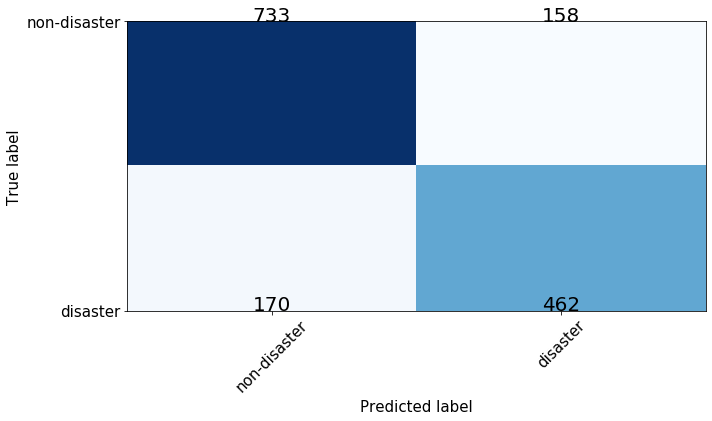

In [17]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

class_names = ['non-disaster','disaster']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize = 15)
    plt.yticks(tick_marks, classes,fontsize = 15)

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",fontsize = 20)

    plt.ylabel('True label', fontsize = 15)
    plt.xlabel('Predicted label', fontsize = 15)
    plt.tight_layout()

predictions = clf_nb.predict(cv_x_test)
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

No Skill: ROC AUC=0.500
gb: ROC AUC=0.777


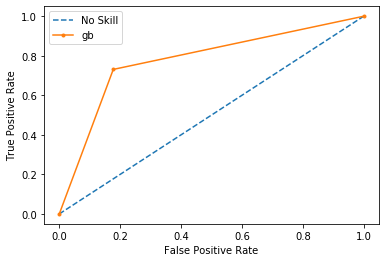

In [18]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, predictions)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('gb: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='gb')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



Now, in the viewer, you can submit the above file to the competition! Good luck!
